# Symbolic regression 2D

$y(X_0, X_1) = X_0^2 - X_1^2 + X_1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

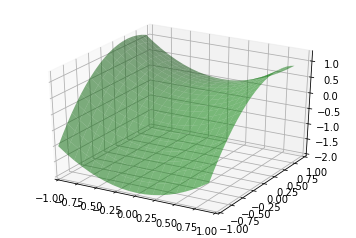

In [2]:
x0 = np.arange(-1, 1, 1/10)
x1 = np.arange(-1, 1, 1/10)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1, color='green', alpha=0.5)
plt.show()

In [3]:
from sklearn.utils import check_random_state

rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1

Solve using PyCGP

In [4]:
from pycgp.individual_builder import IndividualBuilder
from pycgp.selection import truncation_selection
from pycgp.mutation import point_mutation, active_mutation, single_mutation
from pycgp.params import DEFAULT_PARAMS
from pycgp.counter import Counter

In [30]:
NPOP = 50 # number of individuals in population
GENS = 5000 # number of generations

In [29]:
DEFAULT_PARAMS['n_rows'] = 1
DEFAULT_PARAMS['n_cols'] = 100
DEFAULT_PARAMS['n_inputs'] = 2
DEFAULT_PARAMS['n_outputs'] = 1
builder = IndividualBuilder(DEFAULT_PARAMS)

In [27]:
from sklearn.metrics import mean_squared_error
fitness_function = mean_squared_error

In [31]:
population = [builder.build() for _ in range(0, NPOP)]
prev_fitness = 0

for gen in range(0, GENS):
    output = [i.execute(X_train) for i in population]
    
    fitnesses = []
    for index, y_pred in enumerate(output):
        fit = fitness_function(y_train, y_pred)
        fitnesses.append(fit)
    
    parent, parent_fitness = truncation_selection(population, fitnesses, 1)[0]
    
    if parent_fitness < 0.001:
        break
    
    if gen%500 == 0:
        print(gen, parent_fitness)
    
    population = [active_mutation(parent) for _ in range(0, NPOP-1)] + [parent]
    
print(gen, parent_fitness)

0 0.702368181249
500 0.196402808749
1000 0.196402808749
1500 0.196402808749
2000 0.196402808749
2500 0.196402808749
3000 0.196402808749
3500 0.196402808749
4000 0.196402808749
4500 0.196402808749
4999 0.196402808749


Print results

In [20]:
output = [i.execute(X_train) for i in population]
fitness = [fitness_function(y_train, y_pred) for y_pred in output]

spop = sorted(zip(population, fitness), key=lambda x: x[1])

print('individuals: ')
for ind, fit in spop[0:1]:
    print(fit)
    print(ind)
    print(ind.genes)
    print('-'*10)

individuals: 
0.19640280875
protected_div(fdiv(x1,protected_div(fmul(fdiv(x1,x1),x0),fmul(fmul(fdiv(x1,x1),x0),x1))),protected_div(fmul(fdiv(x1,x1),x0),fmul(fmul(fdiv(x1,x1),x0),x1)))
[1, 1, 1, 2, 2, 0, 2, 3, 1, 3, 1, 3, 0, 3, 5, 3, 1, 2, 3, 3, 4, 1, 1, 8, 0, 1, 3, 0, 3, 4, 0, 0, 5, 2, 11, 4, 1, 2, 3, 3, 12, 8, 1, 0, 11, 3, 9, 8, 1, 17, 12, 0, 9, 13, 1, 9, 10, 3, 6, 7, 0, 20, 14, 1, 0, 21, 0, 11, 7, 0, 17, 0, 0, 2, 3, 2, 12, 21, 3, 9, 13, 2, 6, 10, 3, 9, 7, 3, 10, 5, 3, 7, 16, 2, 6, 11, 3, 17, 4, 2, 30, 3, 0, 2, 28, 0, 24, 4, 2, 1, 34, 1, 1, 18, 1, 30, 17, 3, 18, 18, 1, 22, 38, 1, 15, 37, 1, 14, 12, 1, 14, 15, 1, 9, 6, 1, 4, 41, 3, 10, 36, 2, 7, 45, 2, 36, 16, 0, 27, 18, 17]
----------


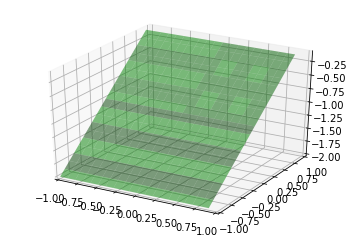

In [21]:
y_gp = np.array(spop[0][0].execute(np.c_[x0.ravel(), x1.ravel()])).reshape(x0.shape)

ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_gp, rstride=1, cstride=1, color='green', alpha=0.5)

In [11]:
from sklearn.tree import DecisionTreeRegressor

est_tree = DecisionTreeRegressor()
est_tree.fit(X_train, y_train)
y_tree = est_tree.predict(np.c_[x0.ravel(), x1.ravel()]).reshape(x0.shape)

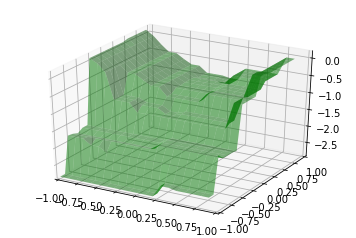

In [12]:
ax = plt.figure().gca(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_tree, rstride=1, cstride=1, color='green', alpha=0.5)